In [9]:
import numpy as np
import math
from statsmodels.distributions.empirical_distribution import ECDF
import texttable as ttable
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


In [10]:
def get_bounds(mean, deviation):
    coef_mtrx = np.array([[1, 1], [1, -1]])
    free_el_vector = np.array([2 * mean, math.pow((12 * deviation), 1 / 2)])
    result = np.linalg.solve(coef_mtrx, free_el_vector)
    return result[1], result[0]


def g(y):
    return math.atan(y)


def cdf_y(y):
    return math.tan(y) / 18 + 0.32

def pdf_y(y):
    return 1 / (18 * math.pow(math.cos(y), 2))

def get_x_var_series(a, b):
    random_dist_nums = np.linspace(0, 1, 100)
    x_variations = [i * (b - a) + a for i in random_dist_nums]
    x_variations.sort()
    return x_variations


def get_y_var_series(x_series):
    result = [g(x) for x in x_series]
    result.sort
    return result


def print_cdf_table(cdf):
    table = ttable.Texttable()
    table.header(['x', 'F(x)'])
    for i in range(len(cdf.x)):
        table.add_row([cdf.x[i], cdf.y[i]])
        
    print(table.draw())


def show_cdf_plot(x_1, p_1):
    plt.plot(x, p)
    plt.ylabel('P(x)')
    plt.xlabel('x')
    plt.show()



In [11]:
a, b = get_bounds(2, 27)
x_series = get_x_var_series(a, b)
y_series = get_y_var_series(x_series)


In [12]:
def count_in_bounds(arr, a, b):
    return len([i for i in arr if (a <= i and i <= b)])


def get_equal_interv_series(bounds, n, arr):
    intervals = np.linspace(*bounds, n)
    frequencies = [count_in_bounds(arr, intervals[i-1], intervals[i]) for i in range(1, len(intervals))]
    return intervals, [0, *frequencies] 

def prepare_for_ecdf(values, frequencies): 
    result = []
    for i in range(len(values)):
        result += [values[i]] * frequencies[i]
        
    return result

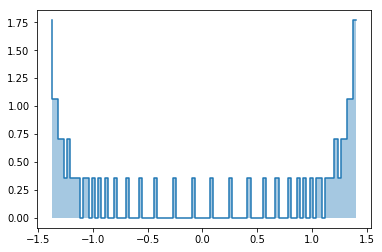

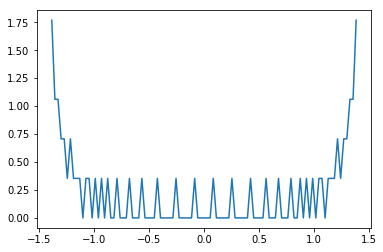

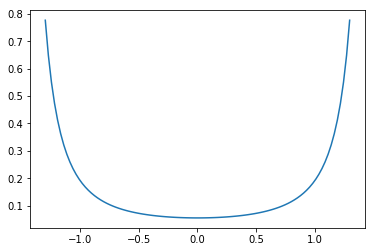

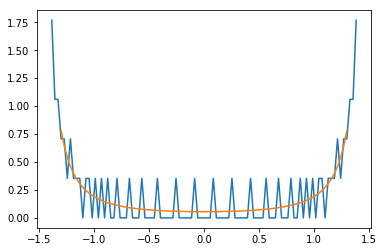

In [14]:
n = 100

def get_ecdf_p(v, ecdf):
    for i in range(len(ecdf.x)):
        if ecdf.x[i] > v:
            return ecdf.y[i]
        
    return 1

def get_amount_in_bounds(a, b, arr):
    return len([i for i in arr if (a <= i and i <= b)])

def get_intervals(bounds, n):
    linspace = np.linspace(*bounds, n)
    return [(linspace[i-1], linspace[i]) for i in range(1, len(linspace))]

def get_eq_int_hist_data(series, bounds, n):
    intervals = get_intervals(bounds, n)
    amount = len(series)
    step = intervals[0][1] - intervals[0][0]
    height = [get_amount_in_bounds(*i, series) / (amount * step) for i in intervals]
    return intervals, height

def plot_eq_int_hist(series, bounds, n):
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    intervals_bounds = [i[1] for i in intervals]
    plt.plot(intervals_bounds, heights, drawstyle="steps")
    plt.fill_between(intervals_bounds, heights,  step="pre", alpha=0.4)

def plot_eq_int_polygon(series, bounds, n):
    intervals, heights = get_eq_int_hist_data(series, bounds, n)
    polygon_x = [(a + b) / 2 for a, b in intervals]
    plt.plot(polygon_x, heights)

def plot_pdf():
    l = np.linspace(-1.3, 1.3, 100)
    plt.plot(l, [pdf_y(i) for i in l])

plot_eq_int_hist(y_series, bounds, n)
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plt.show()

plot_pdf()
plt.show()

plot_eq_int_polygon(y_series, bounds, n)
plot_pdf()
plt.show()

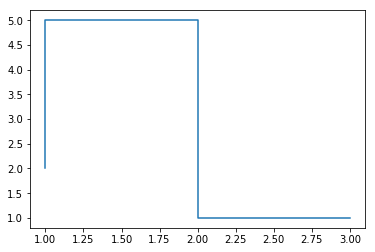

In [61]:
plt.step([1, 2, 3], [2, 5, 1])

In [112]:
pdf_y(1)

0.1903066011563755